In [1]:
# Cell 1: Imports and utility functions

import os
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)


In [8]:
# Cell 2: Function to load all predictions from a given directory.
def load_predictions(results_dir):
    datasets = [
        'benign_with_logo_predict.csv',
        'benign_without_logo_predict.csv',
        'Fresh_Logo_Phishing_predict.csv',
        'Learned_Logo_Phishing_predict.csv',
        'No_Logo_Phishing_predict.csv'
    ]
    
    dfs = []
    for file in datasets:
        path = os.path.join(results_dir, file)
        if os.path.exists(path):
            df = pd.read_csv(path)
            # Extract true label based on filename: 0 if 'benign' is in the file name, otherwise 1
            if 'benign' in file:
                df['true_label'] = 0
            else:
                df['true_label'] = 1
            dfs.append(df)
    return pd.concat(dfs)

# Specify results directory.
results_dir = "/home/tiffanybao/PhishIntention/results/4.12/rule_based"

# Load the predictions.
df = load_predictions(results_dir)


In [ ]:
# Cell 3: Function to evaluate performance and print detailed reports.
def evaluate_performance(df):
    y_true = df['true_label']
    y_pred = df['phish_category']
    
    # Calculate overall metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Print overall performance
    print("=== Overall Performance ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}") 
    print(f"F1 Score: {f1:.4f}")
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print("\n=== Confusion Matrix ===")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    
    # Print classification report
    # print("\n=== Classification Report ===")
    # print(classification_report(y_true, y_pred))
    
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'FP': fp,
        'FN': fn
    }

# Evaluate performance on all the loaded data
metrics = evaluate_performance(df)


=== Overall Performance ===
Accuracy: 0.5390
Precision: 0.5826
Recall: 0.7021
F1 Score: 0.6368

=== Confusion Matrix ===
True Negatives (TN): 159
False Positives (FP): 341
False Negatives (FN): 202
True Positives (TP): 476

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.44      0.32      0.37       500
           1       0.58      0.70      0.64       678

    accuracy                           0.54      1178
   macro avg       0.51      0.51      0.50      1178
weighted avg       0.52      0.54      0.52      1178



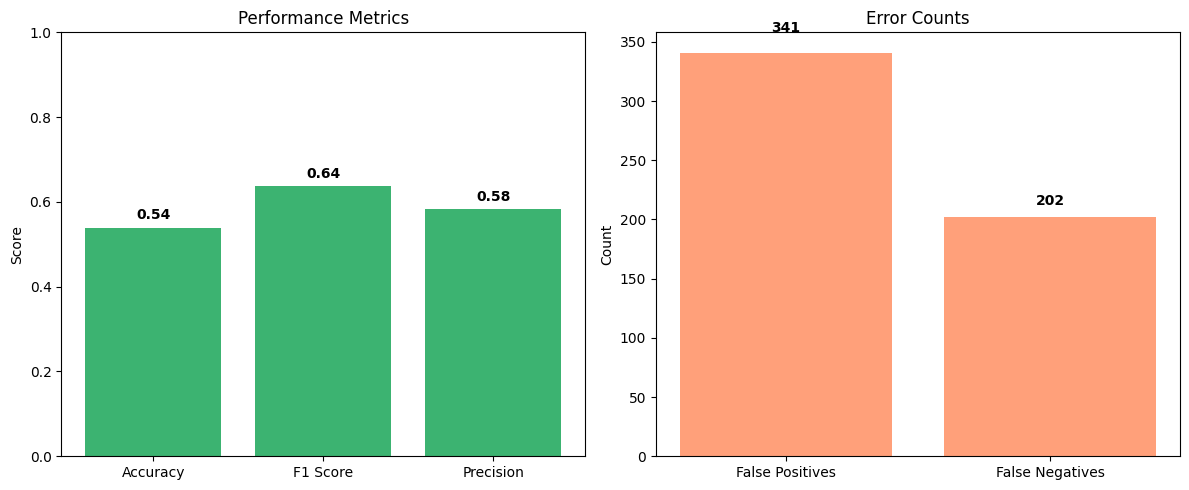

In [10]:
# Cell: Visualize Performance Metrics for Text Analysis Model

import matplotlib.pyplot as plt
import numpy as np

# Assume the 'metrics' dictionary was produced by your evaluate_performance() function.

# Prepare data for performance metrics (accuracy, F1, precision)
performance_labels = ['Accuracy', 'F1 Score', 'Precision']
performance_values = [
    metrics['accuracy'],
    metrics['f1'],
    metrics['precision']
]

# Prepare data for error counts (False Positives, False Negatives)
error_labels = ['False Positives', 'False Negatives']
error_values = [
    metrics['FP'],
    metrics['FN']
]

# Create subplots: one for performance metrics and one for error counts.
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Performance Metrics
axs[0].bar(performance_labels, performance_values, color='mediumseagreen')
axs[0].set_ylim(0, 1)
axs[0].set_title('Performance Metrics')
axs[0].set_ylabel('Score')
for i, v in enumerate(performance_values):
    axs[0].text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

# Plot Error Counts
axs[1].bar(error_labels, error_values, color='lightsalmon')
axs[1].set_title('Error Counts')
axs[1].set_ylabel('Count')
for i, v in enumerate(error_values):
    # Adjust vertical offset for annotation based on count value.
    axs[1].text(i, v + max(1, 0.05 * v), f"{v}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()
